<a href="https://colab.research.google.com/github/Dekromatia/RSA/blob/main/hw3task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
__author__ = 'Chris Potts'


class RSA:
    """Implementation of the core Rational Speech Acts model.

    Parameters
    ----------
    lexicon : `np.array` or `pd.DataFrame`
        Messages along the rows, states along the columns.
    prior : array-like
        Same length as the number of colums in `lexicon`.
    costs : array-like
        Same length as the number of rows in `lexicon`.
    alpha : float
        The temperature parameter. Default: 1.0
    """
    def __init__(self, lexicon, prior, costs, alpha=1.0):
        self.lexicon = lexicon
        self.prior = np.array(prior)
        self.costs = np.array(costs)
        self.alpha = alpha

    def literal_listener(self):
        """Literal listener predictions, which corresponds intuitively
        to truth conditions with priors.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.

        """
        return rownorm(self.lexicon * self.prior)

    def speaker(self):
        """Returns a matrix of pragmatic speaker predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to states, the columns to states.
        """
        lit = self.literal_listener().T
        utilities = self.alpha * (safelog(lit) + self.costs)
        return rownorm(np.exp(utilities))

    def listener(self):
        """Returns a matrix of pragmatic listener predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.
        """
        spk = self.speaker().T
        return rownorm(spk * self.prior)


def rownorm(mat):
    """Row normalization of np.array or pd.DataFrame"""
    return (mat.T / mat.sum(axis=1)).T


def safelog(vals):
    """Silence distracting warnings about log(0)."""
    with np.errstate(divide='ignore'):
        return np.log(vals)


if __name__ == '__main__':
    """Examples"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)

# Core lexicon:
    msgs = ['hat', 'glasses', 'mustache']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 1.0, 0.0],
        [0.0, 0.0, 1.0],
        [0.0, 1.0, 0.0]],
         index=msgs, columns=states)
    print("="*70 + "\nEven priors and all-0 message costs\n")
    basic_mod = RSA(lexicon=lex, prior=[0.33, 0.33, 0.33], costs=[0.0, 0.0, 0.0])

    display_reference_game(basic_mod)

    print("\nLiteral listener")
    display(basic_mod.literal_listener())

    print("\nPragmatic speaker")
    display(basic_mod.speaker())

    print("\nPragmatic listener")
    display(basic_mod.listener())



    # Core lexicon:
    msgs = ['hat', 'glasses', 'mustache']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 1.0, 0.0],
        [0.0, 0.0, 1.0],
        [0.0, 1.0, 0.0]],
         index=msgs, columns=states)
    print("="*70 + "\nEven priors changed and all-0 message costs\n")
    basic_mod = RSA(lexicon=lex, prior=[0.1, 0.45, 0.45], costs=[0.0, 0.0, 0.0])

    display_reference_game(basic_mod)

    print("\nLiteral listener")
    display(basic_mod.literal_listener())

    print("\nPragmatic speaker")
    display(basic_mod.speaker())

    print("\nPragmatic listener")
    display(basic_mod.listener())

Even priors and all-0 message costs



,r1,r2,r3,costs
hat,1.00,1,0,0
glasses,0.00,0,1,0
mustache,0.00,1,0,0
prior,0.33,0.33,0.33,
alpha,1.00,,,



Literal listener


,r1,r2,r3
hat,0.5,0.5,0.0
glasses,0.0,0.0,1.0
mustache,0.0,1.0,0.0



Pragmatic speaker


,hat,glasses,mustache
r1,1.000000,0.0,0.000000
r2,0.333333,0.0,0.666667
r3,0.000000,1.0,0.000000



Pragmatic listener


,r1,r2,r3
hat,0.75,0.25,0.0
glasses,0.00,0.00,1.0
mustache,0.00,1.00,0.0


Even priors changed and all-0 message costs



,r1,r2,r3,costs
hat,1.0,1,0,0
glasses,0.0,0,1,0
mustache,0.0,1,0,0
prior,0.1,0.45,0.45,
alpha,1.0,,,



Literal listener


,r1,r2,r3
hat,0.181818,0.818182,0.0
glasses,0.000000,0.000000,1.0
mustache,0.000000,1.000000,0.0



Pragmatic speaker


,hat,glasses,mustache
r1,1.00,0.0,0.00
r2,0.45,0.0,0.55
r3,0.00,1.0,0.00



Pragmatic listener


,r1,r2,r3
hat,0.330579,0.669421,0.0
glasses,0.000000,0.000000,1.0
mustache,0.000000,1.000000,0.0


лшгпгна

3.2 если посмотреть на наше распределение Pragmatic listner
 
c измененной исходной вероятностью prior(r1)=0.1, prior(r2)=0.45, prior(r3)=0.45
можем наблюдать что с уменьшением исходной вероятности для r1 уменьшается и вероятность того что прагматический слушатель выберет "шляпу" , но при этом вероятность выбора импликатуры r2 возрастает почти в 3 раза было 0.25 , стало  0.669. из чего мы можем сделать вывод: что исходная вероятность сильно влияет на распределение вероятностей для прагматического слушающего, 
и при ее уменьшении импликатура может вообще проспасть как в нашем случае: прогматический слушающий теперь с большей вероятностью выбирает "шляпу"

исходное распределение вероятностей для прагматического слушающего при исходной вероятности для всх r=0.33 :

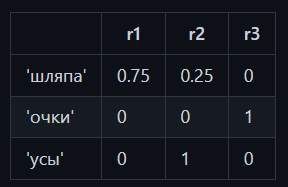

3.1 приведите конверсациональную(скалярную) импликатуру, которую можно вывести из таблицы прагматического слушающего выше

при высказывании "шляпа" прогматичный слушатель, в соответствии с максимой количества, с большей вероятностью 0.75 выберет человека в шляпе(r1) нежели  человека с усами и в гляпе(r2) (0.25) 




